In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

import tensorflow as tf
from keras import models
from keras import layers

import math
from sklearn.model_selection import train_test_split, StratifiedKFold
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline
keras.backend.set_image_data_format('channels_last')

### Carregando o arquivo da base, UCI_Credit_Card.csv, e nomeando cada um dos seus atributos originais como explicado acima

In [68]:
df = pd.read_csv("UCI_Credit_Card.csv", names = ["ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default.payment.next.month"])
df = df.drop([0])

## Keras

In [69]:
model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(2460000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))



def load_data_kfold(k):
    
    train = df
    
    X_train = np.array((df.drop('default.payment.next.month', axis=1)).drop('ID', axis=1).values)
    
    y_train = np.array(train['default.payment.next.month'].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

k = 7
folds, X_train, y_train = load_data_kfold(k)

def get_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(46, activation='relu', input_shape=(23,)))
    model.add(layers.Dense(46, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 46)                1104      
_________________________________________________________________
dense_128 (Dense)            (None, 46)                2162      
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 47        
Total params: 3,313
Trainable params: 3,313
Non-trainable params: 0
_________________________________________________________________


In [70]:
Keras_Accuracy_Antes = 0
Keras_Loss_Antes = 0

for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_cv = X_train[train_idx]
    y_train_cv = y_train[train_idx]
    X_valid_cv = X_train[val_idx]
    y_valid_cv= y_train[val_idx]
    
    name_weights = "final_model_fold" + str(j) + "_weights.h5"
    model = get_model()
    model.fit(X_train_cv,
              y_train_cv,
              epochs=10,
              batch_size=32)
    
    test_loss, test_accuracy = model.evaluate(X_valid_cv, y_valid_cv)
    
    Keras_Accuracy_Antes = (Keras_Accuracy_Antes + test_accuracy)
    Keras_Loss_Antes = (Keras_Loss_Antes + test_loss)
    
    print("Loss: %s | Accuracy: %s" % (test_loss, test_accuracy))


Fold  0
Epoch 1/10
25714/25714 [==============================] - 4s 157us/step - loss: 3.5654 - acc: 0.7788
Epoch 2/10
25714/25714 [==============================] - 2s 86us/step - loss: 3.5654 - acc: 0.7788
Epoch 3/10
25714/25714 [==============================] - 2s 59us/step - loss: 3.5654 - acc: 0.7788: 0s - loss: 3.5808 - acc: 0.7
Epoch 4/10
25714/25714 [==============================] - 2s 68us/step - loss: 3.5654 - acc: 0.7788
Epoch 5/10
25714/25714 [==============================] - 2s 60us/step - loss: 3.5654 - acc: 0.7788
Epoch 6/10
25714/25714 [==============================] - 1s 54us/step - loss: 3.5654 - acc: 0.7788
Epoch 7/10
25714/25714 [==============================] - 1s 53us/step - loss: 3.5654 - acc: 0.7788
Epoch 8/10
25714/25714 [==============================] - 1s 53us/step - loss: 3.5654 - acc: 0.7788
Epoch 9/10
25714/25714 [==============================] - 1s 57us/step - loss: 3.5654 - acc: 0.7788
Epoch 10/10
4286/4286 [==============================] - 1s 

In [71]:
    Keras_Accuracy_Antes = Keras_Accuracy_Antes/k
    Keras_Loss_Antes = Keras_Loss_Antes/k
    print(Keras_Accuracy_Antes)
    print(Keras_Loss_Antes)

0.7782999764132636
3.5732532893145073


# Lendo csv pré-processado

In [72]:
df = pd.read_csv("credit_preprocessed.csv")

df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_D1,PAY_6_D2,PAY_6_D3,PAY_6_D4,PAY_6_D5,PAY_6_D6,PAY_6_D7,PAY_6_D8,PAY_6_D9,Class
0,1,0.010101,0,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,...,0,0,0,0,0,0,0,0,0,1
1,2,0.111111,0,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,...,0,1,0,0,0,0,0,0,0,1
2,3,0.080808,0,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,...,0,0,0,0,0,0,0,0,0,0
3,4,0.040404,0,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,...,0,0,0,0,0,0,0,0,0,0
4,5,0.040404,1,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.shape
df = df.drop('ID', axis=1)

# Aplicando Keras

In [74]:
model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(2460000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))



def load_data_kfold(k):
    
    train = df
    
    X_train = np.array(df.drop('Class', axis=1).values)
    
    y_train = np.array(train["Class"].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

k = 7
folds, X_train, y_train = load_data_kfold(k)

def get_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(46, activation='relu', input_shape=(82,)))
    model.add(layers.Dense(46, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 46)                3818      
_________________________________________________________________
dense_155 (Dense)            (None, 46)                2162      
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 47        
Total params: 6,027
Trainable params: 6,027
Non-trainable params: 0
_________________________________________________________________


In [75]:
Keras_Accuracy = 0
Keras_Loss = 0

for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_cv = X_train[train_idx]
    y_train_cv = y_train[train_idx]
    X_valid_cv = X_train[val_idx]
    y_valid_cv= y_train[val_idx]
    
    name_weights = "final_model_fold" + str(j) + "_weights.h5"
#     callbacks = get_callbacks(name_weights = name_weights, patience_lr=10)
#     generator = gen.flow(X_train_cv, y_train_cv, batch_size = batch_size)
    model = get_model()
    model.fit(X_train_cv,
              y_train_cv,
              epochs=10,
              batch_size=32)
    
    test_loss, test_accuracy = model.evaluate(X_valid_cv, y_valid_cv)
    Keras_Accuracy = (Keras_Accuracy + test_accuracy)
    Keras_Loss = (Keras_Loss + test_loss)
    print("Loss: %s | Accuracy: %s" % (test_loss, test_accuracy))


Fold  0
Epoch 1/10
25714/25714 [==============================] - 5s 195us/step - loss: 0.4519 - acc: 0.8140
Epoch 2/10
25714/25714 [==============================] - 2s 60us/step - loss: 0.4377 - acc: 0.8211: 0s - loss: 0.43
Epoch 3/10
25714/25714 [==============================] - 2s 61us/step - loss: 0.4357 - acc: 0.8225
Epoch 4/10
25714/25714 [==============================] - 2s 77us/step - loss: 0.4353 - acc: 0.8223
Epoch 5/10
25714/25714 [==============================] - 2s 80us/step - loss: 0.4350 - acc: 0.8217
Epoch 6/10
25714/25714 [==============================] - 2s 75us/step - loss: 0.4338 - acc: 0.8226: 0s - loss: 0.4346 - acc: 0.8
Epoch 7/10
25714/25714 [==============================] - 2s 69us/step - loss: 0.4336 - acc: 0.8231
Epoch 8/10
25714/25714 [==============================] - 2s 60us/step - loss: 0.4332 - acc: 0.8236
Epoch 9/10
25714/25714 [==============================] - 1s 57us/step - loss: 0.4327 - acc: 0.8238
Epoch 10/10
4286/4286 [====================

In [76]:
    Keras_Accuracy = Keras_Accuracy/k
    Keras_Loss = Keras_Loss/k
    print(Keras_Accuracy)
    print(Keras_Loss)

0.8203666702028064
0.4387589894667317


In [77]:
df = pd.read_csv("credit_preprocessed.csv")

## Comparação de Resultados

Antes 
Accuracy: 0.78  e Loss: 3.57 
Depois 
Accuracy: 0.82  e Loss: 0.44


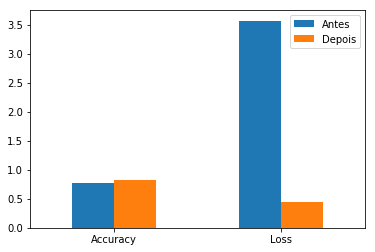

In [78]:
data = {'Antes':[Keras_Accuracy_Antes, Keras_Loss_Antes],
        'Depois':[Keras_Accuracy, Keras_Loss]} 

print("Antes \nAccuracy: %.2f  e Loss: %.2f \nDepois \nAccuracy: %.2f  e Loss: %.2f" % (Keras_Accuracy_Antes, Keras_Loss_Antes, Keras_Accuracy, Keras_Loss))

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Accuracy', 'Loss']) 

ax = dfResultados.plot.bar(rot=0)